In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
salary_df = pd.read_csv('salary.csv')

In [3]:
salary_df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

- There is no null values in this dataset

In [5]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
YearsExperience    35 non-null float64
Salary             35 non-null int64
dtypes: float64(1), int64(1)
memory usage: 640.0 bytes


In [6]:
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


- The total number of data in the dataset - 35
- Average experience of the persons in this dataset is 6 years with approx 83,945 rupees as salary
- Minimum is 1 year experience with 37,731 rupees as salary

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8CF35F60>,
      dtype=object)

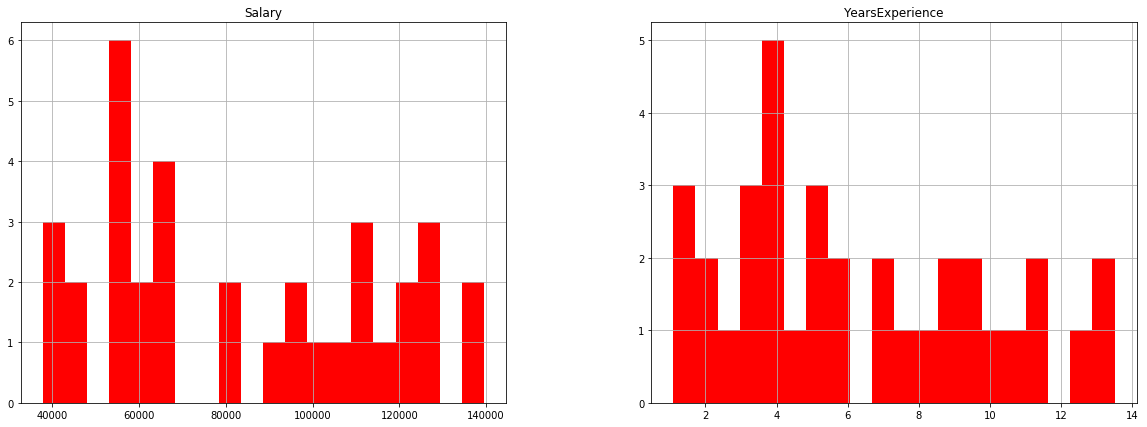

In [9]:
salary_df.hist(bins=20, figsize = (20,7), color = 'r')

- Most of the employees in this dataset receives about 50,000 - 65,000 rupees.
- Most of the employees in this dataset have about 2-6 years of experience.

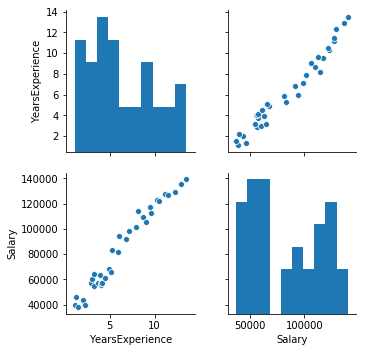

In [10]:
sns.pairplot(salary_df)

- From this it can be understood that, there is a linear relationship between years and salary

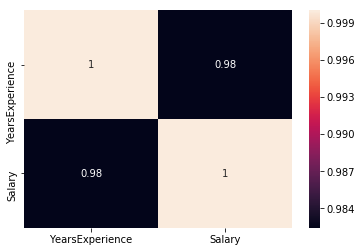

In [11]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

- There is about 98% correlation between salary and years of experience 

In [37]:
max_years = salary_df.YearsExperience.max()

for i in range(len(salary_df)):
    if salary_df.YearsExperience[i] == max_years:
        print("Salary of most experienced employee: ",salary_df.Salary[i])

Salary of most experienced employee:  139465


In [39]:
min_years = salary_df.YearsExperience.min()

for i in range(len(salary_df)):
    if salary_df.YearsExperience[i] == min_years:
        print("Salary of most experienced employee: ",salary_df.Salary[i])

Salary of most experienced employee:  39343


In [40]:
X = salary_df.drop(['Salary'],axis=1)
Y = salary_df['Salary']

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [161]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28, 1)
(28,)
(7, 1)
(7,)


In [162]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

In [163]:
score = model.score(x_test,y_test)

In [164]:
print("Test Score: ",score)

Test Score:  0.8914234140042779


In [165]:
print("Coefficients (m)", model.coef_)
print("Intercept (b)", model.intercept_)

Coefficients (m) [8578.76747669]
Intercept (b) 29078.626034406887


In [166]:
y_predict = model.predict(x_test)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

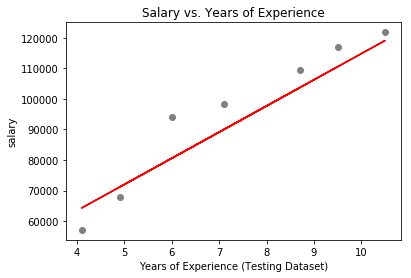

In [169]:
# VISUALIZE TEST SET RESULTS
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_predict, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')